In [1]:
import torch
from pytorch3d.io import load_objs_as_meshes
from pytorch3d.structures import Meshes
from pytorch3d.renderer import Textures

# Set the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load the mesh
obj_filename = "data/cow.obj"
mesh = load_objs_as_meshes([obj_filename], device=device)

# Print the mesh to verify
print(mesh)

In [6]:
import torch

# Define colors
color1 = torch.tensor([1.0, 0.0, 0.0], device=device)  # Red
color2 = torch.tensor([0.0, 0.0, 1.0], device=device)  # Blue

# Get the vertices of the mesh
verts = mesh.verts_packed()

# Get the z-coordinates of the vertices
z_vals = verts[:, 2] # [N, xyz]
# Find the min and max z-coordinates
zmin = z_vals.min()
zmax = z_vals.max()

# Linearly interpolate colors based on z-coordinates
alpha = (z_vals - zmin) / (zmax - zmin)
alpha = alpha.unsqueeze(1)  # [N, 1]
colors = alpha * color2 + (1 - alpha) * color1 # [N, 3]

# Create textures
textures = Textures(verts_rgb=colors[None])

# Assign textures to the mesh
mesh.textures = textures

# Print the textures to verify
print(mesh.textures)

tensor([[0.6591, 0.0000, 0.3409],
        [0.0977, 0.0000, 0.9023],
        [0.5392, 0.0000, 0.4608],
        ...,
        [0.0039, 0.0000, 0.9961],
        [0.0087, 0.0000, 0.9913],
        [0.0012, 0.0000, 0.9988]])


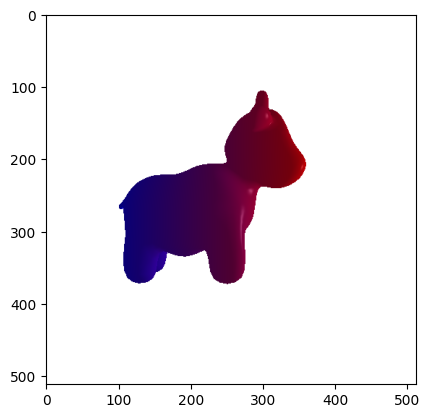

In [11]:
from starter.utils import get_mesh_renderer

import pytorch3d

# Set the image size
image_size = 512

R, T = pytorch3d.renderer.cameras.look_at_view_transform(dist=3, elev=0, azim=90, degrees=True)
# Prepare the camera:
cameras = pytorch3d.renderer.FoVPerspectiveCameras(
    R=R, T=T, fov=60, device=device
)

# Define the lights
lights = pytorch3d.renderer.PointLights(location=[[0, 0, -3]], device=device)

# Define the renderer
renderer = get_mesh_renderer(image_size=image_size, lights=lights)

# Render the mesh
images = renderer(mesh, cameras=cameras)

# Display the rendered image
import matplotlib.pyplot as plt
plt.imshow(images[0, ..., :3].cpu().numpy())
plt.show()